## Problem Statement
We have to predict Height of person help of Weight.

## Gathering Data
I have taken Dataset from http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html
This is a simple dataset to start with. It contains only the height (inches) and weights (pounds) of 25,000 different humans of 18 years of age. This dataset can be used to build a model that can predict the heights or weights of a human.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor

import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV

## Import Data

In [2]:
data = pd.read_csv("HeightWeight.csv")
data

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


## Data Analysis

In [3]:
data.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [4]:
data.shape

(25000, 3)

####  In our data, `Index` columns is unnecessary, so let's drop it.

In [5]:
data = data.drop("Index",axis=1)
data

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
...,...,...
24995,69.50215,118.0312
24996,64.54826,120.1932
24997,64.69855,118.2655
24998,67.52918,132.2682


In [6]:
data.describe()

,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


####  I will convert Height from `inches` to  `centimeters` and and weight from `pounds` to `kg`. and store it in **convertedDF**
* `Height(Inches)` => `Height`  in cm
* `Weight(Pounds)` => `Weight`  in kg

In our data Height given into `Inches` I will convert it `centimeters` and and weight from `pounds` to `kg` 

In [7]:
convertedDF = pd.DataFrame()
convertedDF["Weight"] = data["Weight(Pounds)"]*0.4536
convertedDF["Height"] = data["Height(Inches)"]*2.54
convertedDF

,Weight,Height
0,51.253398,167.089607
1,61.910639,181.648633
2,69.413002,176.272800
3,64.563337,173.270164
4,65.453165,172.181037
...,...,...
24995,53.538952,176.535461
24996,54.519636,163.952580
24997,53.645231,164.334317
24998,59.996856,171.524117


In [8]:
convertedDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  25000 non-null  float64
 1   Height  25000 non-null  float64
dtypes: float64(2)
memory usage: 390.8 KB


#### In our there is no missing value, and all value in numeric, so there is no need to change datatypes, and filling missing value.

<AxesSubplot:ylabel='Density'>

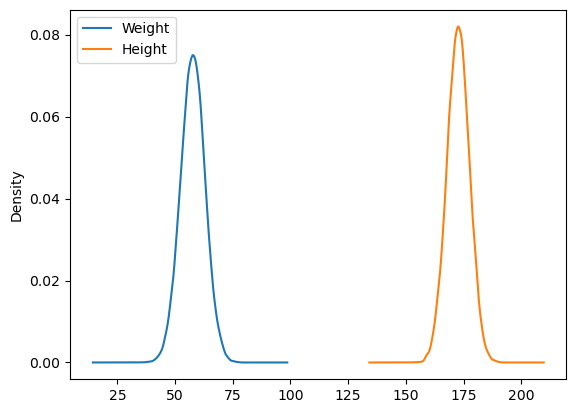

In [9]:
convertedDF.plot(kind="density")

(array([  13.,  112.,  759., 2949., 6397., 7677., 4986., 1714.,  360.,
          33.]),
 array([35.38749514, 39.60185826, 43.81622139, 48.03058452, 52.24494764,
        56.45931077, 60.67367389, 64.88803702, 69.10240015, 73.31676327,
        77.5311264 ]),
 <BarContainer object of 10 artists>)

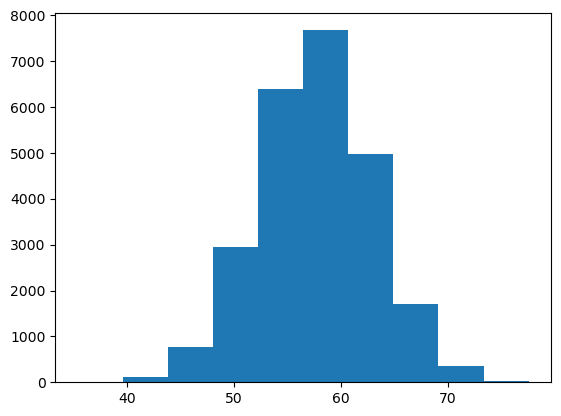

In [10]:
plt.hist(convertedDF.Weight)

(array([   9.,  136., 1003., 3248., 6644., 7406., 4548., 1681.,  291.,
          34.]),
 array([153.1070344 , 156.88514216, 160.66324992, 164.44135768,
        168.21946544, 171.9975732 , 175.77568096, 179.55378872,
        183.33189648, 187.11000424, 190.888112  ]),
 <BarContainer object of 10 artists>)

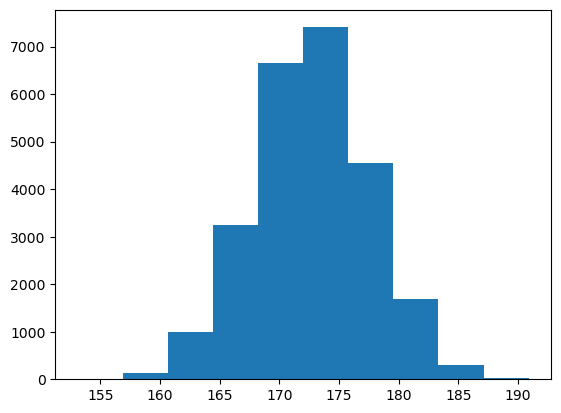

In [11]:
plt.hist(convertedDF.Height)

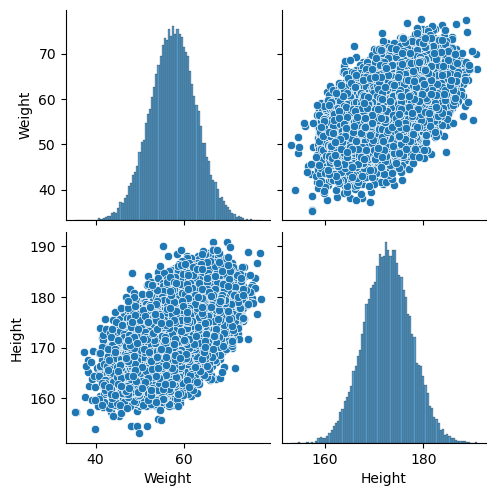

In [12]:
sns.pairplot(convertedDF)

In [13]:
# Correlation matrix
convertedDF.corr()

,Weight,Height
Weight,1.000000,0.502859
Height,0.502859,1.000000


## Spliting our data into features and labels

In [15]:
x = convertedDF["Weight"]
y = convertedDF["Height"]
x,y

(0        51.253398
 1        61.910639
 2        69.413002
 3        64.563337
 4        65.453165
            ...    
 24995    53.538952
 24996    54.519636
 24997    53.645231
 24998    59.996856
 24999    56.642937
 Name: Weight, Length: 25000, dtype: float64,
 0        167.089607
 1        181.648633
 2        176.272800
 3        173.270164
 4        172.181037
             ...    
 24995    176.535461
 24996    163.952580
 24997    164.334317
 24998    171.524117
 24999    174.949129
 Name: Height, Length: 25000, dtype: float64)

## Split our data into Training and Test Dataset

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_train.shape

((20000,), (5000,), (20000,), (20000,))

## Feature Scaling

In [17]:
sc = StandardScaler()

# I'm converting 1D array to Dataframe, for feature scaling and futher training
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
x_train = pd.DataFrame(sc.fit_transform(x_train))
x_test = pd.DataFrame(sc.transform(x_test))

In [18]:
x_train

,0
0,-0.152594
1,0.535439
2,0.236870
3,0.087264
4,-1.526560
...,...
19995,2.067190
19996,-1.691229
19997,-0.366861
19998,1.148155


## Training Model

In [19]:
Basemodel = DecisionTreeRegressor(random_state=42)
Basemodel.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [20]:
Basemodel.score(x_test,y_test)

-0.49143741567125554

In [21]:
y_preds = Basemodel.predict(x_test)
y_preds

array([176.7296186, 174.2978988, 172.669962 , ..., 177.4077732,
       177.2155206, 174.395257 ])

## Evaluting Our model

In [22]:
score = {}

In [23]:
# Create function to evaluate model

def evaluate_model(model,y_test,y_preds):
    r2 = r2_score(y_test,y_preds)
    mae = mean_absolute_error(y_test,y_preds)
    mse = mean_squared_error(y_test,y_preds)
    rmse = math.sqrt(mean_squared_error(y_test,y_preds))
    
    
    print(f"The r2 score of model is {r2:.4f}.")
    print(f"The mean absolute error of model is {mae:.4f}.")
    print(f"The mean sqaured error of model is {mse:.4f}.")
    print(f"The root mean sqaured error of model is {rmse:.4f}.")
    
    score[model] = [r2,mae,mse,rmse]
    

In [24]:
evaluate_model("Basemodel",y_test,y_preds)

The r2 score of model is -0.4914.
The mean absolute error of model is 4.7590.
The mean sqaured error of model is 35.4800.
The root mean sqaured error of model is 5.9565.


## Hyperparameter Tunning


In [25]:
gs_grid = {
    "splitter": ["best","random"],
    "max_depth": [None,5,10,20,50,100],
    "min_samples_split": [2,5,10],
    "max_features":["auto","sqrt","log2"],
    "max_leaf_nodes":[None,10,20,50,100]
}

In [26]:
gs_model = GridSearchCV(estimator=DecisionTreeRegressor(),
                        param_grid=gs_grid,
                        cv=5)
gs_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 5, 10, 20, 50, 100],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 20, 50, 100],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [27]:
gs_model.best_params_

{'max_depth': 20,
 'max_features': 'log2',
 'max_leaf_nodes': 50,
 'min_samples_split': 10,
 'splitter': 'random'}

In [28]:
ypredGS = gs_model.predict(x_test)

In [29]:
evaluate_model("gs_model",y_test,ypredGS)

The r2 score of model is 0.2421.
The mean absolute error of model is 3.3875.
The mean sqaured error of model is 18.0295.
The root mean sqaured error of model is 4.2461.


In [30]:
scoreDF = pd.DataFrame(score,index=["r2","mae","mse","rmse"])

scoreDF

,Basemodel,gs_model
r2,-0.491437,0.242112
mae,4.758964,3.387479
mse,35.479960,18.029474
rmse,5.956506,4.246113


<AxesSubplot:>

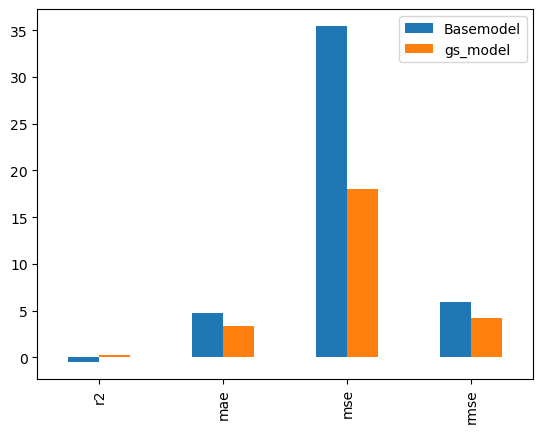

In [31]:
scoreDF.plot(kind="bar")

#### So we have achived more accuracy with hypertunned parameter.

### Thank you for reading....